In [34]:

import pandas as pd
import numpy as np
import random
from scipy.stats import loguniform, lognorm
from scipy import stats
import time
import math
from matplotlib import pyplot as plt

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns

In [36]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

# Load and format the data

In [37]:
import pandas as pd
import numpy as np

def npy2df(input_file, return_gene_info=False):
    """
    Load the npy file with X number of bursting parameter estimation for a given gene. 
    if return_gene_info is True : 
        return the df containing the estimation, the gene index number (starting from 1, not 0) and a gene array of some sort?
    else: return the dataframe with the parameter estimation as column and each estimation attemps as rows
        
    """
    gene_no, gene, result = np.load(input_file, allow_pickle='True')
    
    result_flatten = result.flatten()
    df = pd.DataFrame([x for x in result_flatten])
    
    if return_gene_info:
        return(df, gene_no, gene)
    else:
        return(df)

In [38]:
%ls ./plot_gtm_5000

gene_Atf4_biallelic.npy  gene_Atf4_cast.npy      gene_Fos_c57.npy
gene_Atf4_c57.npy        gene_Fos_biallelic.npy  gene_Fos_cast.npy


In [39]:
%pwd

'/home/anna/Documents/research_projects/transcriptional_bursting'

In [40]:
df = npy2df('./plot_gtm_5000/gene_Fos_c57.npy')
df

,kon,ron,koff,roff,mu,delta,dist
0,0.177634,0.274173,2.108189,7.225365,80.303911,1.0,0.076652
1,6.127418,5.203205,0.400687,0.704417,83.874562,1.0,0.252441
2,3.748272,1.182511,10.457457,6.567164,95.401035,1.0,0.322622
3,7.020078,2.043361,15.624613,8.591618,66.879193,1.0,0.268577
4,7.280038,1.864468,15.875188,7.867852,67.998497,1.0,0.239116
...,...,...,...,...,...,...,...
4995,3.804228,0.902766,2.138972,0.551978,55.485709,1.0,0.559850
4996,5.905861,2.637155,1.632033,1.604325,104.714272,1.0,0.352958
4997,7.519651,2.735737,1.568814,1.029543,60.264016,1.0,0.284098
4998,7.020078,2.043361,15.624613,8.591618,66.879193,1.0,0.268577


In [41]:
def BFandBS(df):
    """
    input is the dataframe containing the parameters as columns.
    need column named 'koff', 'roff', 'kon', 'ron' 
    
    compute burst frequency and burst size from the parameters
    """
    df['tau_off']= df['kon']/df['ron']
    df['tau_on'] = df['koff']/df['roff']
    df['bf'] = 1./(df['tau_on'] + df['tau_off'])
    df['bs'] = df['mu'] * df['tau_on']

In [42]:
BFandBS(df)
df

,kon,ron,koff,roff,mu,delta,dist,tau_off,tau_on,bf,bs
0,0.177634,0.274173,2.108189,7.225365,80.303911,1.0,0.076652,0.647890,0.291776,1.064208,23.430766
1,6.127418,5.203205,0.400687,0.704417,83.874562,1.0,0.252441,1.177624,0.568821,0.572592,47.709644
2,3.748272,1.182511,10.457457,6.567164,95.401035,1.0,0.322622,3.169755,1.592386,0.209990,151.915235
3,7.020078,2.043361,15.624613,8.591618,66.879193,1.0,0.268577,3.435555,1.818588,0.190326,121.625693
4,7.280038,1.864468,15.875188,7.867852,67.998497,1.0,0.239116,3.904619,2.017728,0.168852,137.202493
...,...,...,...,...,...,...,...,...,...,...,...
4995,3.804228,0.902766,2.138972,0.551978,55.485709,1.0,0.559850,4.213970,3.875107,0.123624,215.013037
4996,5.905861,2.637155,1.632033,1.604325,104.714272,1.0,0.352958,2.239482,1.017271,0.307054,106.522758
4997,7.519651,2.735737,1.568814,1.029543,60.264016,1.0,0.284098,2.748675,1.523797,0.234057,91.830123
4998,7.020078,2.043361,15.624613,8.591618,66.879193,1.0,0.268577,3.435555,1.818588,0.190326,121.625693


In [43]:
df['log_kon'] = [np.log10(x) for x in df['kon']]
df['log_koff'] = [np.log10(x) for x in df['koff']]

In [44]:
df['log_bs'] = [np.log10(x) for x in df['bs']]
df['log_bf'] = [np.log10(x) for x in df['bf']]

# Smooth kernel density 

Kernel density estimate KDE


In [45]:
from scipy.stats import gaussian_kde
def best_parameters(df, density_kernel_name=None, save_kde="density_kernel"):
    """
    return the index for the best parameters.
    
    if density_kernel_name is None , we recompute the gaussian kde and if save_kde is a str. 
    Save the kde in df using save_kde as column name
    """
    
    if density_kernel_name is None:
        # Calculate the point density
        xy = np.vstack([df['bs'],df['bf']])
        z = gaussian_kde(xy)(xy)
        if save_kde is not False:
            df[save_kde] = z
            
    else:
        z = df[density_kernel_name]
    
    return(np.where(z == np.amax(z))[0][0])

        

In [46]:
best_parameters(df)

834

In [47]:
df

,kon,ron,koff,roff,mu,delta,dist,tau_off,tau_on,bf,bs,log_kon,log_koff,log_bs,log_bf,density_kernel
0,0.177634,0.274173,2.108189,7.225365,80.303911,1.0,0.076652,0.647890,0.291776,1.064208,23.430766,-0.750474,0.323910,1.369786,0.027027,0.001771
1,6.127418,5.203205,0.400687,0.704417,83.874562,1.0,0.252441,1.177624,0.568821,0.572592,47.709644,0.787278,-0.397195,1.678606,-0.242155,0.008178
2,3.748272,1.182511,10.457457,6.567164,95.401035,1.0,0.322622,3.169755,1.592386,0.209990,151.915235,0.573831,1.019426,2.181601,-0.677802,0.018280
3,7.020078,2.043361,15.624613,8.591618,66.879193,1.0,0.268577,3.435555,1.818588,0.190326,121.625693,0.846342,1.193809,2.085025,-0.720502,0.095418
4,7.280038,1.864468,15.875188,7.867852,67.998497,1.0,0.239116,3.904619,2.017728,0.168852,137.202493,0.862134,1.200719,2.137362,-0.772494,0.045931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3.804228,0.902766,2.138972,0.551978,55.485709,1.0,0.559850,4.213970,3.875107,0.123624,215.013037,0.580267,0.330205,2.332465,-0.907899,0.001023
4996,5.905861,2.637155,1.632033,1.604325,104.714272,1.0,0.352958,2.239482,1.017271,0.307054,106.522758,0.771283,0.212729,2.027442,-0.512785,0.043261
4997,7.519651,2.735737,1.568814,1.029543,60.264016,1.0,0.284098,2.748675,1.523797,0.234057,91.830123,0.876198,0.195571,1.962985,-0.630679,0.052489
4998,7.020078,2.043361,15.624613,8.591618,66.879193,1.0,0.268577,3.435555,1.818588,0.190326,121.625693,0.846342,1.193809,2.085025,-0.720502,0.095418


In [48]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.color_palette("viridis")

def plot_kde(df, bs, bf, kde="density_kernel",
             title=None, dot_size=4, colormap='viridis',
             best_param=True,
             linestype='-', color_line='grey',
             norm_scale=True,
             show=True,
             save=None):
    """
    

    --> put the line with best parameter as an option..
    
    --> later we need to create a wrapper function to give a adata objet + a gene name
    
    df
    bs
    df
    kde="density_kernel"
    title
    size
    colormap
    best_param
    linestype
    color_line
    norm_scale
    show
    save
    """
    
    # scatter plot
    if norm_scale:
        fig = sns.scatterplot(data=df, x=bf, y=bs,
                              hue=kde, size_norm=(0,1),
                              palette=colormap, s=dot_size)
    else:
        fig = sns.scatterplot(data=df, x=bf, y=bs,
                              hue=kde, hue_norm=(np.min(df['density_kernel']),
                                                 np.max(df['density_kernel'])),
                              palette=colormap, s=dot_size)
    
    if title is not None: 
        fig.set_title(title)
    
    #plt.legend(loc=legend_loc)
    plt.legend(bbox_to_anchor=(1.05, 1),
               loc='upper left',
               borderaxespad=0,
              title='kernel density')
    
    if best_param : 
    
        # Add the best parameter estimation based on the density kernel
        index_max_parameter = best_parameters(df, save_kde="density_kernel")
        xmax = df[bs][index_max_parameter]
        ymax = df[bf][index_max_parameter]
        fig.axvline(ymax, color="grey", linestyle="-.", linewidth=0.5) #linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
        fig.axhline(xmax, color="grey", linestyle="-.", linewidth=0.5)
    
    
    # plot / saving settings
    if save is not None:
        plt.savefig(save, bbox_inches='tight')
    if show :
        plt.show()

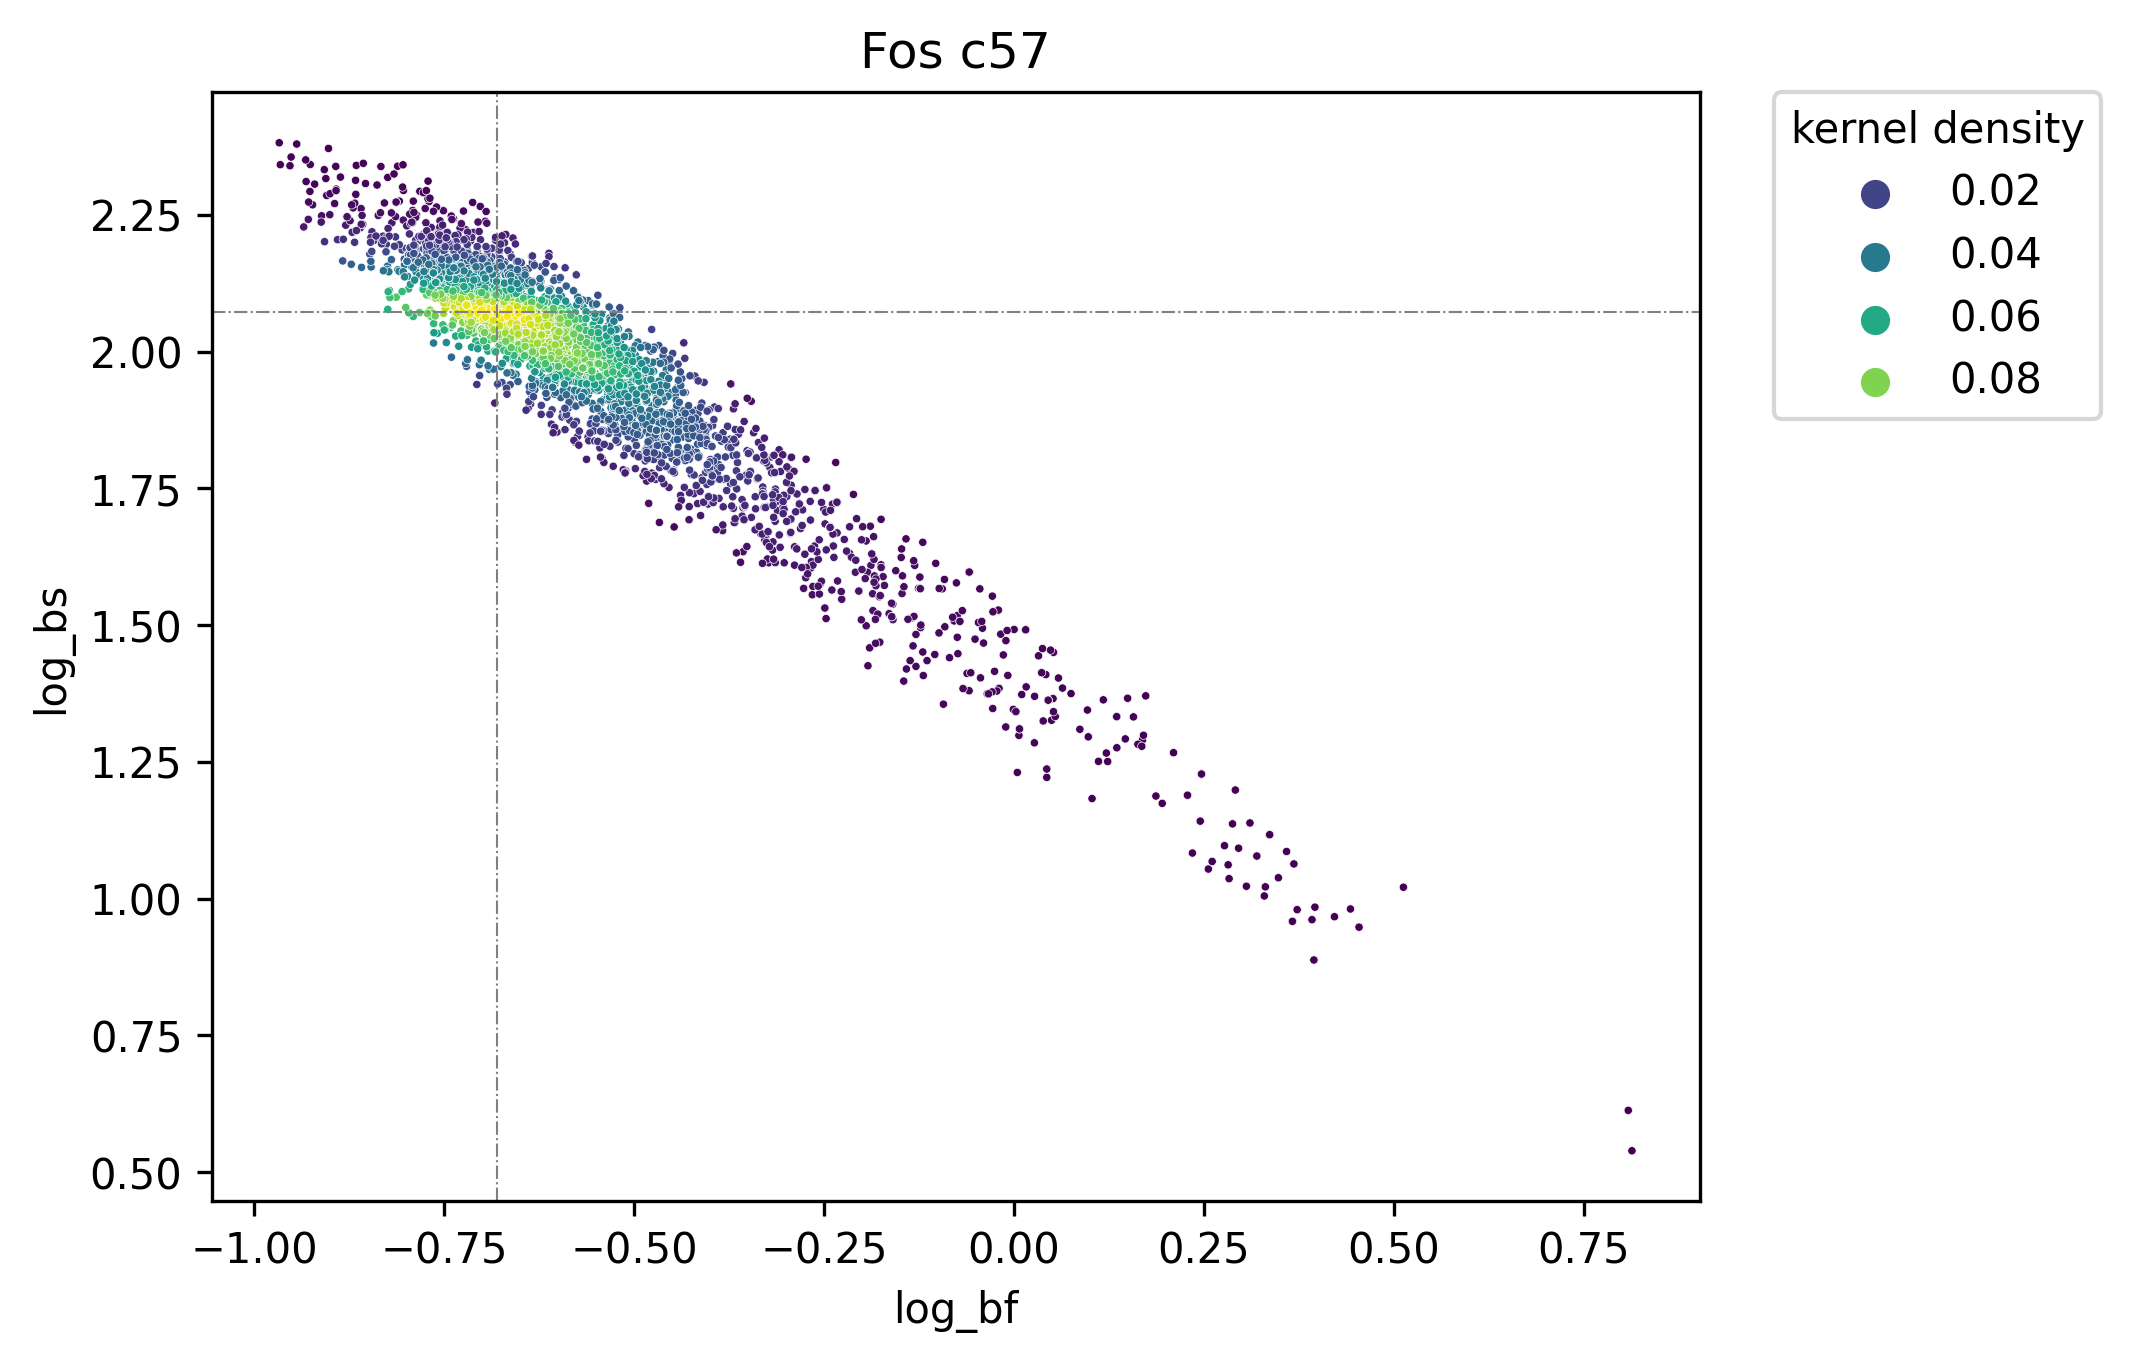

In [49]:
plot_kde(df, bs="log_bs", bf="log_bf", title="Fos c57", dot_size=4, save="Fos_c57_kde.png")